In [1]:
# Importing packages
from __future__ import print_function
import cobra
import os
from os.path import join
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cobra.util.solver import linear_reaction_coefficients
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
#Read the unconstrained file
MSI_textbook=cobra.io.read_sbml_model("/home/gaikwad/Documents/Mithil/Cobrapy/references_SBML/PlantCoreMetabolism_v2_0_0.xml")
MSI_textbook

Name,PlantCoreMetabolism_v1_3_0
Memory address,0x07fe1ec2b67f0
Number of metabolites,861
Number of reactions,892
Number of groups,208
Objective expression,1.0*Phloem_output_tx - 1.0*Phloem_output_tx_reverse_990b1
Compartments,"Mitochondrion, Cytoplasm, Biomass, Plastid, Vacuole, Peroxisome, Endoplasmic reticulum, Mitochondrion innermembrane interacting with cristal space, Mitochondrion innermembrane interacting with inter membrane space, Extracellular, Thylakoid, Mitochondrial intermembrane space"


# ATP Budget Plots

In [3]:
#Creating an empty dataframe
df_p = []
df_c = []
ATP = ["ATP_c", "ATP_m", "ATP_p", "ATP_x"]
compartment = ["_c", "_m", "_p", "_x"]

for (a,com) in zip(ATP,compartment):
    i = MSI_textbook.metabolites.get_by_id(a).summary()
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-4-d733aab3a37a>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**ATP Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
ADENYL_KIN_RXN_m,Mitochondria,17.442707,ADENYL_KIN_RXN_m,0.025537,60.785773
GLUTAMINESYN_RXN_m,Mitochondria,11.252670,GLUTAMINESYN_RXN_m,0.016474,39.214227
6PFRUCTPHOS_RXN_c,Cytosol,9.255846,6PFRUCTPHOS_RXN_c,0.013584,1.358373
ASNSYNA_RXN_c,Cytosol,0.507933,ASNSYNA_RXN_c,0.000745,0.074543
ATP_CITRATE_PRO_S_LYASE_RXN_c,Cytosol,0.141305,ATP_CITRATE_PRO_S_LYASE_RXN_c,0.000207,0.020738
FRUCTOKINASE_RXN_c,Cytosol,9.255846,FRUCTOKINASE_RXN_c,0.013584,1.358373
GLUTKIN_RXN_c,Cytosol,0.141305,GLUTKIN_RXN_c,0.000207,0.020738
PROTON_ATPase_c,Cytosol,650.000000,PROTON_ATPase_c,0.953930,95.392987
PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c,Cytosol,12.089577,PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c,0.017742,1.774248
6PFRUCTPHOS_RXN_p,Plastid,1.123243,6PFRUCTPHOS_RXN_p,0.003883,1.403651


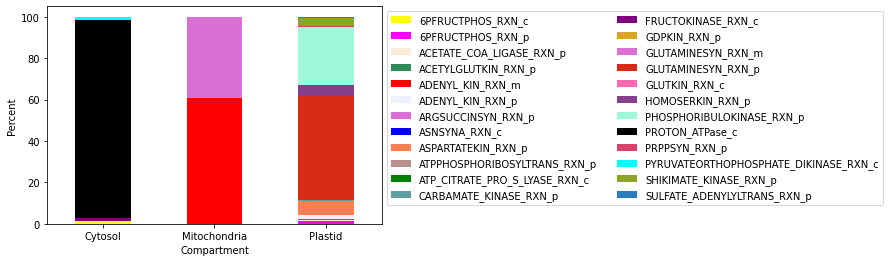

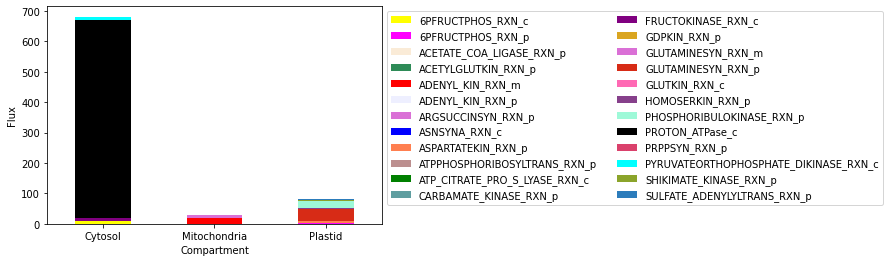

In [4]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]


import random

#import seaborn as sns

number_of_colors = len(new1.flux)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

color_dict = {'ADENYL_KIN_RXN_m': 'red', 'GLUTAMINESYN_RXN_m': 'orchid', '6PFRUCTPHOS_RXN_c': 'yellow',
              'ASNSYNA_RXN_c': 'blue', 'ATP_CITRATE_PRO_S_LYASE_RXN_c': 'green','FRUCTOKINASE_RXN_c': 'purple',
              'GLUTKIN_RXN_c': '#ff69b4', 'PROTON_ATPase_c': 'black', 'PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c': 'cyan',
              '6PFRUCTPHOS_RXN_p': 'magenta', 'ACETATE_COA_LIGASE_RXN_p': '#faebd7','ACETYLGLUTKIN_RXN_p': '#2e8b57',
              'ADENYL_KIN_RXN_p': '#eeefff', 'ARGSUCCINSYN_RXN_p': '#da70d6', 'ASPARTATEKIN_RXN_p': '#ff7f50',
              'ATPPHOSPHORIBOSYLTRANS_RXN_p': '#bc8f8f','CARBAMATE_KINASE_RXN_p': '#5f9ea0',
              'GDPKIN_RXN_p': '#daa520', 'GLUTAMINESYN_RXN_p': '#D72B16',
            'HOMOSERKIN_RXN_p': '#86408B', 'PHOSPHORIBULOKINASE_RXN_p': '#9EF9D8',
              'PRPPSYN_RXN_p': '#DA416C', 'SHIKIMATE_KINASE_RXN_p': '#8BA42B',
              'SULFATE_ADENYLYLTRANS_RXN_p': '#2C7CBB'}


"""Plotting the ATP Consumption budget"""
# Stacked barchart
"""Percentage"""
printmd("**ATP Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True,ylabel="Percent", color =color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol = 2)
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('ATP_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')

"""Flux"""
df = new1.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=True, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol = 2)
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('ATP_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

In [5]:
#color_code = pd.DataFrame()
#cc = pd.DataFrame.from_dict(color_dict, orient='index')
#color_code=color_code.append(cc)

**ATP production budget plot**

,Compartment,flux,reaction,percent,Percentage
Mitochondrial_ATP_Synthase_m,Mitochondria,683.049983,Mitochondrial_ATP_Synthase_m,1.000000,100.000000
PEPDEPHOS_RXN_c,Cytosol,31.792032,PEPDEPHOS_RXN_c,0.046657,55.129267
PHOSGLYPHOS_RXN_c,Cytosol,13.278614,PHOSGLYPHOS_RXN_c,0.019487,23.025903
UDPKIN_RXN_c,Cytosol,12.597510,UDPKIN_RXN_c,0.018488,21.844829
Plastidial_ATP_Synthase_p,Plastid,289.285714,Plastidial_ATP_Synthase_p,1.000000,100.000000


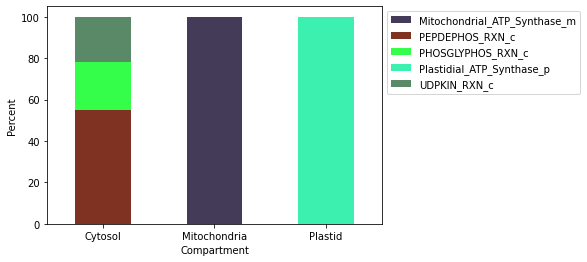

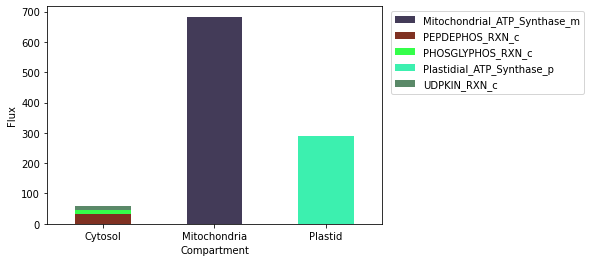

In [6]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []

per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
    new2 = new2.loc[new2['flux']!= 0]
    new2

    
color_dict = {'Mitochondrial_ATP_Synthase_m': '#433B58', 'PEPDEPHOS_RXN_c': '#7F3122',
'PHOSGLYPHOS_RXN_c': '#35FE4A', 'UDPKIN_RXN_c': '#5A8968', 'Plastidial_ATP_Synthase_p': '#3CF0AF'}

"""Plotting the ATP production budget"""
"""Percentage"""
# Stacked barchart
printmd("**ATP production budget plot**")
#new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = new2['reaction'].map(color_dict))
new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('ATP_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')

"""Flux"""
df = new2.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
plt.legend(loc='best', bbox_to_anchor=(1.12, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('ATP_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new2

In [7]:
#cc = pd.DataFrame.from_dict(color_dict, orient='index')
#color_code=color_code.append(cc)

In [8]:
#color_code

In [9]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
ADENYL_KIN_RXN_m,Mitochondria,-17.442707,ADENYL_KIN_RXN_m,0.025537,60.785773
GLUTAMINESYN_RXN_m,Mitochondria,-11.252670,GLUTAMINESYN_RXN_m,0.016474,39.214227
6PFRUCTPHOS_RXN_c,Cytosol,-9.255846,6PFRUCTPHOS_RXN_c,0.013584,1.358373
ASNSYNA_RXN_c,Cytosol,-0.507933,ASNSYNA_RXN_c,0.000745,0.074543
ATP_CITRATE_PRO_S_LYASE_RXN_c,Cytosol,-0.141305,ATP_CITRATE_PRO_S_LYASE_RXN_c,0.000207,0.020738
FRUCTOKINASE_RXN_c,Cytosol,-9.255846,FRUCTOKINASE_RXN_c,0.013584,1.358373
GLUTKIN_RXN_c,Cytosol,-0.141305,GLUTKIN_RXN_c,0.000207,0.020738
PROTON_ATPase_c,Cytosol,-650.000000,PROTON_ATPase_c,0.953930,95.392987
PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c,Cytosol,-12.089577,PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c,0.017742,1.774248
6PFRUCTPHOS_RXN_p,Plastid,-1.123243,6PFRUCTPHOS_RXN_p,0.003883,1.403651


**ATP consumption and production budget plot**

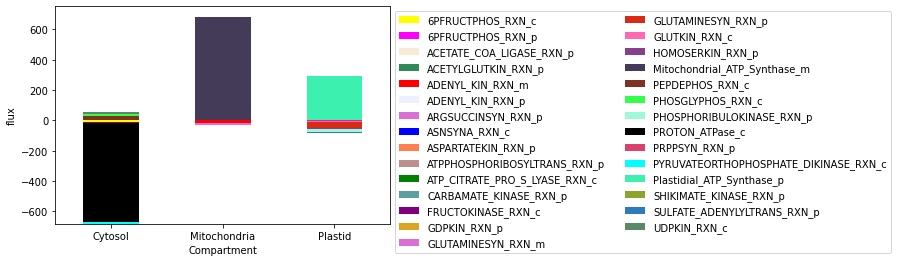

In [10]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

#import seaborn as sns

number_of_colors = len(frames.flux)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

color_dict = {'ADENYL_KIN_RXN_m': 'red', 'GLUTAMINESYN_RXN_m': 'orchid', '6PFRUCTPHOS_RXN_c': 'yellow',
              'ASNSYNA_RXN_c': 'blue', 'ATP_CITRATE_PRO_S_LYASE_RXN_c': 'green','FRUCTOKINASE_RXN_c': 'purple',
              'GLUTKIN_RXN_c': '#ff69b4', 'PROTON_ATPase_c': 'black', 'PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c': 'cyan',
              '6PFRUCTPHOS_RXN_p': 'magenta', 'ACETATE_COA_LIGASE_RXN_p': '#faebd7','ACETYLGLUTKIN_RXN_p': '#2e8b57',
              'ADENYL_KIN_RXN_p': '#eeefff', 'ARGSUCCINSYN_RXN_p': '#da70d6', 'ASPARTATEKIN_RXN_p': '#ff7f50',
              'ATPPHOSPHORIBOSYLTRANS_RXN_p': '#bc8f8f','CARBAMATE_KINASE_RXN_p': '#5f9ea0',
              'GDPKIN_RXN_p': '#daa520', 'GLUTAMINESYN_RXN_p': '#D72B16',
            'HOMOSERKIN_RXN_p': '#86408B', 'PHOSPHORIBULOKINASE_RXN_p': '#9EF9D8',
              'PRPPSYN_RXN_p': '#DA416C', 'SHIKIMATE_KINASE_RXN_p': '#8BA42B',
              'SULFATE_ADENYLYLTRANS_RXN_p': '#2C7CBB', 'Mitochondrial_ATP_Synthase_m': '#433B58',
              'PEPDEPHOS_RXN_c': '#7F3122', 'PHOSGLYPHOS_RXN_c': '#35FE4A',
              'UDPKIN_RXN_c': '#5A8968', 'Plastidial_ATP_Synthase_p': '#3CF0AF'}



"""Plotting the ATP production budget"""
# Stacked barchart
printmd("**ATP consumption and production budget plot**")
df = frames.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol=2)
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('ATP_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# NADPH plots

In [11]:
#Creating an empty dataframe
df_p = []
df_c = []
NADPH = ["NADPH_c", "NADPH_m", "NADPH_p", "NADPH_x"]
compartment = ["_c", "_m", "_p", "_x"]
for (a,com) in zip(NADPH,compartment):
    i = MSI_textbook.metabolites.get_by_id(a).summary()
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    #producer = p[p.reaction.str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-12-9d51e7afeaf3>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NADPH Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
GLUTSEMIALDEHYDROG_RXN_c,Cytosol,0.217392,GLUTSEMIALDEHYDROG_RXN_c,1.000000,100.000000
ACETOLACTREDUCTOISOM_RXN_p,Plastid,2.508819,ACETOLACTREDUCTOISOM_RXN_p,0.012249,1.224850
ACETOOHBUTREDUCTOISOM_RXN_p,Plastid,0.904820,ACETOOHBUTREDUCTOISOM_RXN_p,0.004417,0.441749
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,Plastid,5.851953,ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,0.028570,2.857028
GLUTATHIONE_REDUCT_NADPH_RXN_p,Plastid,0.434784,GLUTATHIONE_REDUCT_NADPH_RXN_p,0.002123,0.212269
HOMOSERDEHYDROG_RXN_NADP_p,Plastid,4.700364,HOMOSERDEHYDROG_RXN_NADP_p,0.022948,2.294802
MALATE_DEHYDROGENASE_NADP_RXN_p,Plastid,186.812426,MALATE_DEHYDROGENASE_NADP_RXN_p,0.912052,91.205173
N_ACETYLGLUTPREDUCT_RXN_p,Plastid,0.217392,N_ACETYLGLUTPREDUCT_RXN_p,0.001061,0.106135
SHIKIMATE_5_DEHYDROGENASE_RXN_p,Plastid,3.396013,SHIKIMATE_5_DEHYDROGENASE_RXN_p,0.016580,1.657994


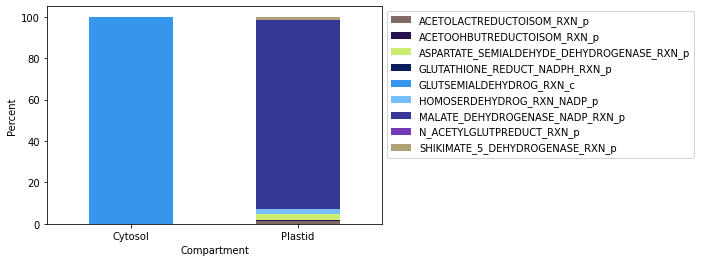

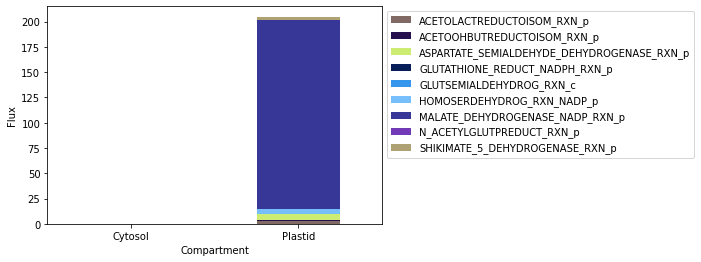

In [12]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]

new1


color_dict = {'GLUTSEMIALDEHYDROG_RXN_c': '#3596EB', 'ACETOLACTREDUCTOISOM_RXN_p': '#816964',
              'ACETOOHBUTREDUCTOISOM_RXN_p': '#26114E','ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p': '#CCED72',
              'GLUTATHIONE_REDUCT_NADPH_RXN_p': '#071E58', 'HOMOSERDEHYDROG_RXN_NADP_p': '#77BFFC',
              'MALATE_DEHYDROGENASE_NADP_RXN_p': '#373797', 'N_ACETYLGLUTPREDUCT_RXN_p': '#733AB8',
              'SHIKIMATE_5_DEHYDROGENASE_RXN_p': '#AEA174'}


"""Plotting the NADPH Consumption budget"""
# Stacked barchart
printmd("**NADPH Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NADPH_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new1.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NADPH_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

In [13]:
#cc = pd.DataFrame.from_dict(color_dict, orient='index')
#color_code=color_code.append(cc)

<ipython-input-14-40684e99731b>:11: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NADPH production budget plot**

,Compartment,flux,reaction,percent,Percentage
METHYLENETHFDEHYDROG_NADP_RXN_c,Cytosol,0.217392,METHYLENETHFDEHYDROG_NADP_RXN_c,1.000000,100.000000
1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,Plastid,204.609177,1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,0.998939,99.893865
RXN_5682_p,Plastid,0.217392,RXN_5682_p,0.001061,0.106135


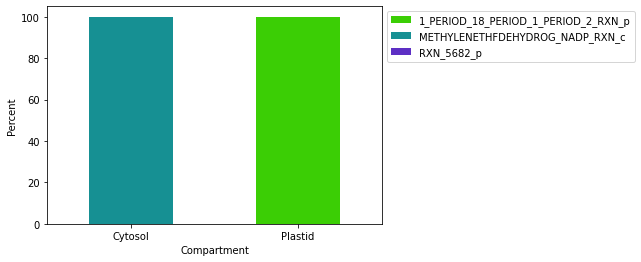

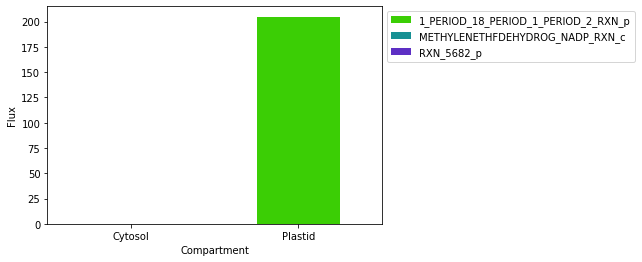

In [14]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    #column_values = pd.Series(per)
    #column_values.dropna()
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
new2 = new2.loc[new2['flux']!= 0]
new2

color_dict = {'METHYLENETHFDEHYDROG_NADP_RXN_c': '#169093', '1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p': '#3BCE05',
'RXN_5682_p': '#5D2FC4'}

"""Plotting the NADPH production budget"""
# Stacked barchart
printmd("**NADPH production budget plot**")
df_1 = new2.pivot_table(index='Compartment', columns='reaction', values='Percentage')
df_1.plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NADPH_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')


df_2 = new2.pivot_table(index='Compartment', columns='reaction', values='flux')
df_2.plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.27, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NADPH_production_flux.jpeg', format='jpeg', bbox_inches ='tight')
new2

In [15]:
#cc = pd.DataFrame.from_dict(color_dict, orient='index')
#color_code=color_code.append(cc)

In [16]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
GLUTSEMIALDEHYDROG_RXN_c,Cytosol,-0.217392,GLUTSEMIALDEHYDROG_RXN_c,1.000000,100.000000
ACETOLACTREDUCTOISOM_RXN_p,Plastid,-2.508819,ACETOLACTREDUCTOISOM_RXN_p,0.012249,1.224850
ACETOOHBUTREDUCTOISOM_RXN_p,Plastid,-0.904820,ACETOOHBUTREDUCTOISOM_RXN_p,0.004417,0.441749
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,Plastid,-5.851953,ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,0.028570,2.857028
GLUTATHIONE_REDUCT_NADPH_RXN_p,Plastid,-0.434784,GLUTATHIONE_REDUCT_NADPH_RXN_p,0.002123,0.212269
HOMOSERDEHYDROG_RXN_NADP_p,Plastid,-4.700364,HOMOSERDEHYDROG_RXN_NADP_p,0.022948,2.294802
MALATE_DEHYDROGENASE_NADP_RXN_p,Plastid,-186.812426,MALATE_DEHYDROGENASE_NADP_RXN_p,0.912052,91.205173
N_ACETYLGLUTPREDUCT_RXN_p,Plastid,-0.217392,N_ACETYLGLUTPREDUCT_RXN_p,0.001061,0.106135
SHIKIMATE_5_DEHYDROGENASE_RXN_p,Plastid,-3.396013,SHIKIMATE_5_DEHYDROGENASE_RXN_p,0.016580,1.657994


**NADPH consumption and production budget plot**

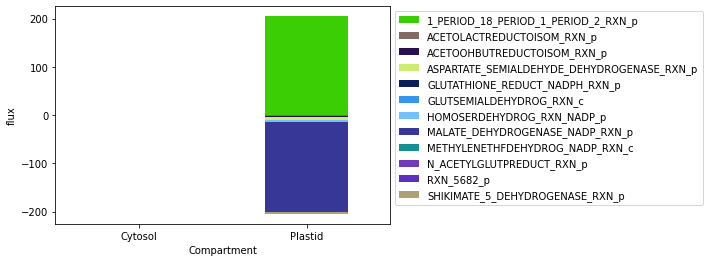

In [17]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

color_dict = {'GLUTSEMIALDEHYDROG_RXN_c': '#3596EB', 'ACETOLACTREDUCTOISOM_RXN_p': '#816964',
              'ACETOOHBUTREDUCTOISOM_RXN_p': '#26114E','ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p': '#CCED72',
              'GLUTATHIONE_REDUCT_NADPH_RXN_p': '#071E58', 'HOMOSERDEHYDROG_RXN_NADP_p': '#77BFFC',
              'MALATE_DEHYDROGENASE_NADP_RXN_p': '#373797', 'N_ACETYLGLUTPREDUCT_RXN_p': '#733AB8',
              'SHIKIMATE_5_DEHYDROGENASE_RXN_p': '#AEA174', 'METHYLENETHFDEHYDROG_NADP_RXN_c': '#169093',
              '1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p': '#3BCE05', 'RXN_5682_p': '#5D2FC4'}


"""Plotting the NADPH production budget"""
# Stacked barchart
printmd("**NADPH consumption and production budget plot**")
df = frames.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('NADPH_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# NAD plots

In [18]:
#Creating an empty dataframe
df_p = []
df_c = []
NAD = ["NAD_c", "NAD_m", "NAD_p", "NAD_x"]
compartment = ["_c", "_m", "_p", "_x"]
for (a,com) in zip(NAD,compartment):
    i = MSI_textbook.metabolites.get_by_id(a).summary()
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    #producer = p[p.reaction.str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-19-a25a14f24af8>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NAD Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
GCVMULTI_RXN_m,Mitochondria,0.032315,GCVMULTI_RXN_m,0.000128,0.012774
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,Mitochondria,20.587592,ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,0.081380,8.137984
MALATE_DEH_RXN_m,Mitochondria,211.556584,MALATE_DEH_RXN_m,0.836253,83.625326
PYRUVDEH_RXN_m,Mitochondria,20.804984,PYRUVDEH_RXN_m,0.082239,8.223916
GAPOXNPHOSPHN_RXN_c,Cytosol,20.428637,GAPOXNPHOSPHN_RXN_c,1.000000,100.000000
3_ISOPROPYLMALDEHYDROG_RXN_p,Plastid,1.069333,3_ISOPROPYLMALDEHYDROG_RXN_p,0.195594,19.559377
PGLYCDEHYDROG_RXN_p,Plastid,3.111053,PGLYCDEHYDROG_RXN_p,0.569049,56.904890
PYRUVDEH_RXN_p,Plastid,0.851941,PYRUVDEH_RXN_p,0.155830,15.583020
RXN_8001_p,Plastid,0.434784,RXN_8001_p,0.079527,7.952713


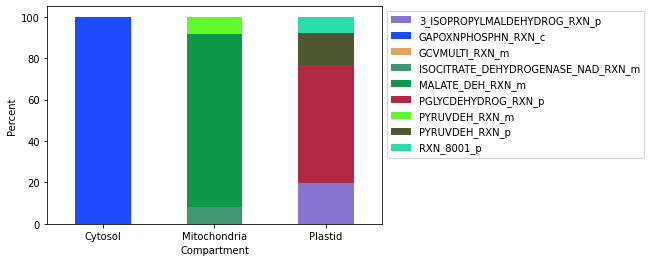

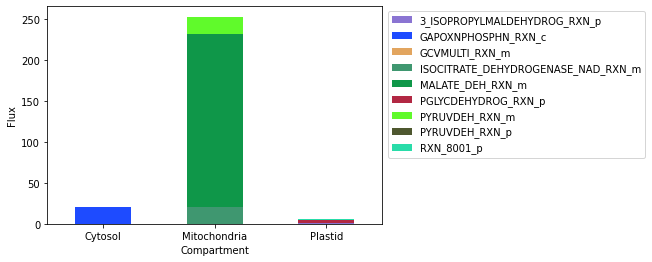

In [19]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]
new1

color_dict = {'GCVMULTI_RXN_m': '#E2A55F', 'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m': '#3F9770',
              'MALATE_DEH_RXN_m': '#0F9749','PYRUVDEH_RXN_m': '#60FA2B', 'GAPOXNPHOSPHN_RXN_c': '#1E4BFF',
'3_ISOPROPYLMALDEHYDROG_RXN_p': '#8A74D2', 'PGLYCDEHYDROG_RXN_p': '#B22843', 'PYRUVDEH_RXN_p': '#4E572F',
              'RXN_8001_p': '#29DCA9'}

"""Plotting the NAD Consumption budget"""
# Stacked barchart
printmd("**NAD Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NAD_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new1.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.30, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NAD_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

In [20]:
#cc = pd.DataFrame.from_dict(color_dict, orient='index')
#color_code=color_code.append(cc)

<ipython-input-21-056f7c800bd3>:11: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NAD production budget plot**

,Compartment,flux,reaction,percent,Percentage
1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c,Cytosol,0.217392,1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c,0.010642,1.064152
MALATE_DEH_RXN_c,Cytosol,19.993853,MALATE_DEH_RXN_c,0.978717,97.871696
PYRROLINECARBREDUCT_RXN_NAD_c,Cytosol,0.217392,PYRROLINECARBREDUCT_RXN_NAD_c,0.010642,1.064152
DIHYDROPICRED_RXN_NAD_p,Plastid,1.151589,DIHYDROPICRED_RXN_NAD_p,0.210639,21.063945
MALATE_DEH_RXN_p,Plastid,4.315521,MALATE_DEH_RXN_p,0.789361,78.936055


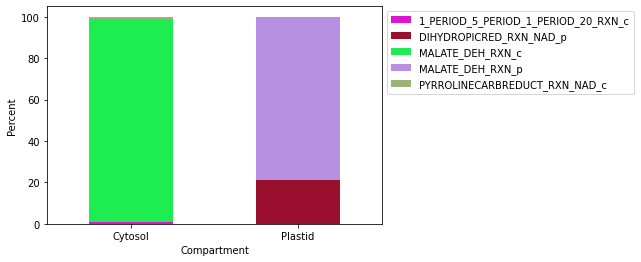

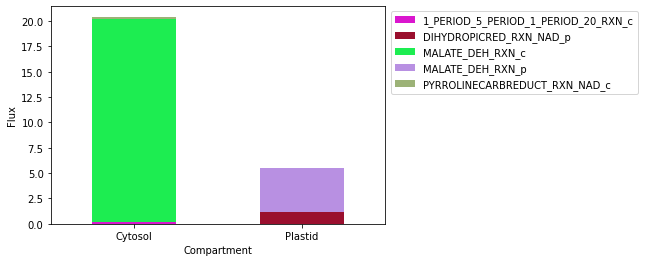

In [21]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    #column_values = pd.Series(per)
    #column_values.dropna()
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
new2 = new2.loc[new2['flux']!= 0]
new2


color_dict = {'1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c': '#DA16CE', 'MALATE_DEH_RXN_c': '#1DED51',
              'PYRROLINECARBREDUCT_RXN_NAD_c': '#9CB277','DIHYDROPICRED_RXN_NAD_p': '#9A0F2E',
              'MALATE_DEH_RXN_p': '#B890E2'}


"""Plotting the NAD production budget"""
# Stacked barchart
printmd("**NAD production budget plot**")
new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NAD_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new2.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.27, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('NAD_production_flux.jpeg', format='jpeg', bbox_inches ='tight')
new2

In [22]:
#cc = pd.DataFrame.from_dict(color_dict, orient='index')
#color_code=color_code.append(cc)

In [23]:
#color_code.to_excel("/home/gaikwad/Documents/Mithil/IPK/IPK_PhD_project_meeting/March_19_2021/color_code.xlsx", sheet_name='Sheet_name_1')

In [24]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
GCVMULTI_RXN_m,Mitochondria,-0.032315,GCVMULTI_RXN_m,0.000128,0.012774
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,Mitochondria,-20.587592,ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,0.081380,8.137984
MALATE_DEH_RXN_m,Mitochondria,-211.556584,MALATE_DEH_RXN_m,0.836253,83.625326
PYRUVDEH_RXN_m,Mitochondria,-20.804984,PYRUVDEH_RXN_m,0.082239,8.223916
GAPOXNPHOSPHN_RXN_c,Cytosol,-20.428637,GAPOXNPHOSPHN_RXN_c,1.000000,100.000000
3_ISOPROPYLMALDEHYDROG_RXN_p,Plastid,-1.069333,3_ISOPROPYLMALDEHYDROG_RXN_p,0.195594,19.559377
PGLYCDEHYDROG_RXN_p,Plastid,-3.111053,PGLYCDEHYDROG_RXN_p,0.569049,56.904890
PYRUVDEH_RXN_p,Plastid,-0.851941,PYRUVDEH_RXN_p,0.155830,15.583020
RXN_8001_p,Plastid,-0.434784,RXN_8001_p,0.079527,7.952713


**NAD consumption and production budget plot**

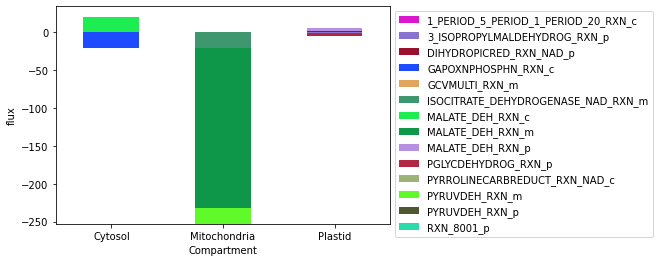

In [25]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

#import seaborn as sns

color_dict = {'GCVMULTI_RXN_m': '#E2A55F', 'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m': '#3F9770',
              'MALATE_DEH_RXN_m': '#0F9749','PYRUVDEH_RXN_m': '#60FA2B', 'GAPOXNPHOSPHN_RXN_c': '#1E4BFF',
'3_ISOPROPYLMALDEHYDROG_RXN_p': '#8A74D2', 'PGLYCDEHYDROG_RXN_p': '#B22843', 'PYRUVDEH_RXN_p': '#4E572F',
              'RXN_8001_p': '#29DCA9', '1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c': '#DA16CE', 'MALATE_DEH_RXN_c': '#1DED51',
              'PYRROLINECARBREDUCT_RXN_NAD_c': '#9CB277','DIHYDROPICRED_RXN_NAD_p': '#9A0F2E',
              'MALATE_DEH_RXN_p': '#B890E2'}


"""Plotting the NAD production budget"""
# Stacked barchart
printmd("**NAD consumption and production budget plot**")
frames.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('NAD_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# Autotrophic model

In [26]:
Auto = MSI_textbook.copy()

Appplying constraints for Autotrophic conditions

In [27]:
Auto.reactions.Sucrose_tx.bounds = (0,0)
Auto.reactions.GLC_tx.bounds = (0,0)

In [28]:
sol_auto = Auto.optimize()

In [29]:
sol_auto

,fluxes,reduced_costs
PRO_PROTON_vc,0.000000e+00,0.000000e+00
Ca_tx,-6.451666e-13,0.000000e+00
H2O_xc,-9.686850e-03,2.330664e-31
sCIT_biomass,1.867470e-13,5.551115e-17
ACETYLGLUTKIN_RXN_p,4.843425e-03,2.428613e-16
...,...,...
RXN_1121_c,0.000000e+00,2.220446e-16
RXN_3422_c,0.000000e+00,-2.220446e-16
SYRINGALDEHYDE_BIOSYNTHESIS_c,0.000000e+00,-1.110223e-16
SYRINGICACID_BIOSYNTHESIS_c,0.000000e+00,1.110223e-16


# ATP Budget Plots

In [30]:
#Creating an empty dataframe
df_p = []
df_c = []
ATP = ["ATP_c", "ATP_m", "ATP_p", "ATP_x"]
compartment = ["_c", "_m", "_p", "_x"]

for (a,com) in zip(ATP,compartment):
    i = Auto.metabolites.get_by_id(a).summary(sol_auto)
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

**ATP Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
ADENYL_KIN_RXN_m,Mitochondria,0.020028,ADENYL_KIN_RXN_m,0.000435,7.397737
GLUTAMINESYN_RXN_m,Mitochondria,0.250706,GLUTAMINESYN_RXN_m,0.005450,92.602263
ASNSYNA_RXN_c,Cytosol,0.011317,ASNSYNA_RXN_c,0.000338,0.082617
ATP_CITRATE_PRO_S_LYASE_RXN_c,Cytosol,0.003148,ATP_CITRATE_PRO_S_LYASE_RXN_c,0.000094,0.022984
GLUTKIN_RXN_c,Cytosol,0.003148,GLUTKIN_RXN_c,0.000094,0.022984
PROTON_ATPase_c,Cytosol,8.170584,PROTON_ATPase_c,0.244154,59.649777
UDPKIN_RXN_c,Cytosol,5.509396,UDPKIN_RXN_c,0.164632,40.221638
ACETATE_COA_LIGASE_RXN_p,Plastid,0.004359,ACETATE_COA_LIGASE_RXN_p,0.000014,0.001377
ACETYLGLUTKIN_RXN_p,Plastid,0.004359,ACETYLGLUTKIN_RXN_p,0.000014,0.001377
ADENYL_KIN_RXN_p,Plastid,0.030514,ADENYL_KIN_RXN_p,0.000096,0.009636


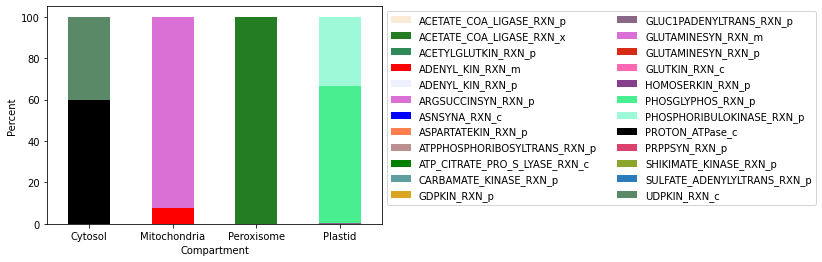

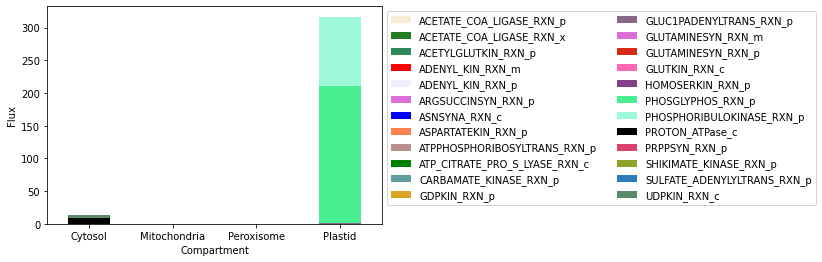

In [31]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]


import random

#import seaborn as sns

number_of_colors = len(new1.flux)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

color_dict = {'ADENYL_KIN_RXN_m': 'red', 'GLUTAMINESYN_RXN_m': 'orchid', '6PFRUCTPHOS_RXN_c': 'yellow',
              'ASNSYNA_RXN_c': 'blue', 'ATP_CITRATE_PRO_S_LYASE_RXN_c': 'green','FRUCTOKINASE_RXN_c': 'purple',
              'GLUTKIN_RXN_c': '#ff69b4', 'PROTON_ATPase_c': 'black', 'PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c': 'cyan',
              '6PFRUCTPHOS_RXN_p': 'magenta', 'ACETATE_COA_LIGASE_RXN_p': '#faebd7','ACETYLGLUTKIN_RXN_p': '#2e8b57',
              'ADENYL_KIN_RXN_p': '#eeefff', 'ARGSUCCINSYN_RXN_p': '#da70d6', 'ASPARTATEKIN_RXN_p': '#ff7f50',
              'ATPPHOSPHORIBOSYLTRANS_RXN_p': '#bc8f8f','CARBAMATE_KINASE_RXN_p': '#5f9ea0',
              'GDPKIN_RXN_p': '#daa520', 'GLUTAMINESYN_RXN_p': '#D72B16',
            'HOMOSERKIN_RXN_p': '#86408B', 'PHOSPHORIBULOKINASE_RXN_p': '#9EF9D8',
              'PRPPSYN_RXN_p': '#DA416C', 'SHIKIMATE_KINASE_RXN_p': '#8BA42B',
              'SULFATE_ADENYLYLTRANS_RXN_p': '#2C7CBB', 'PHOSGLYPHOS_RXN_p': '#48EE90', 'UDPKIN_RXN_c': '#5A8968',
             'ACETATE_COA_LIGASE_RXN_x': '#247D23', 'GLUC1PADENYLTRANS_RXN_p': '#886686'}


"""Plotting the ATP Consumption budget"""
# Stacked barchart
"""Percentage"""
printmd("**ATP Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True,ylabel="Percent", color =color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol = 2)
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_ATP_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')

"""Flux"""
df = new1.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=True, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol = 2)
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_ATP_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

**ATP production budget plot**

,Compartment,flux,reaction,percent,Percentage
Mitochondrial_ATP_Synthase_m,Mitochondria,45.998850,Mitochondrial_ATP_Synthase_m,1.000000,100.0
PEPDEPHOS_RXN_c,Cytosol,0.438965,PEPDEPHOS_RXN_c,0.013117,100.0
Plastidial_ATP_Synthase_p,Plastid,289.285714,Plastidial_ATP_Synthase_p,0.913578,100.0


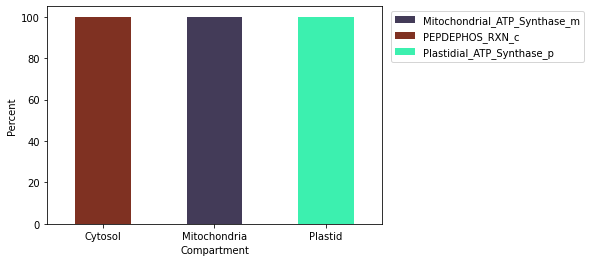

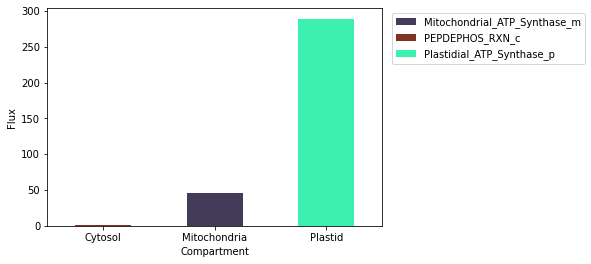

In [32]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []

per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
    new2 = new2.loc[new2['flux']!= 0]
    new2

    
color_dict = {'Mitochondrial_ATP_Synthase_m': '#433B58', 'Plastidial_ATP_Synthase_p': '#3CF0AF',
             'PEPDEPHOS_RXN_p': '#423306', 'PEPDEPHOS_RXN_c': '#7F3122'}

"""Plotting the ATP production budget"""
"""Percentage"""
# Stacked barchart
printmd("**ATP production budget plot**")
#new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = new2['reaction'].map(color_dict))
new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.12, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_ATP_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')

"""Flux"""
df = new2.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.12, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_ATP_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new2

In [33]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
ADENYL_KIN_RXN_m,Mitochondria,-0.020028,ADENYL_KIN_RXN_m,0.000435,7.397737
GLUTAMINESYN_RXN_m,Mitochondria,-0.250706,GLUTAMINESYN_RXN_m,0.005450,92.602263
ASNSYNA_RXN_c,Cytosol,-0.011317,ASNSYNA_RXN_c,0.000338,0.082617
ATP_CITRATE_PRO_S_LYASE_RXN_c,Cytosol,-0.003148,ATP_CITRATE_PRO_S_LYASE_RXN_c,0.000094,0.022984
GLUTKIN_RXN_c,Cytosol,-0.003148,GLUTKIN_RXN_c,0.000094,0.022984
PROTON_ATPase_c,Cytosol,-8.170584,PROTON_ATPase_c,0.244154,59.649777
UDPKIN_RXN_c,Cytosol,-5.509396,UDPKIN_RXN_c,0.164632,40.221638
ACETATE_COA_LIGASE_RXN_p,Plastid,-0.004359,ACETATE_COA_LIGASE_RXN_p,0.000014,0.001377
ACETYLGLUTKIN_RXN_p,Plastid,-0.004359,ACETYLGLUTKIN_RXN_p,0.000014,0.001377
ADENYL_KIN_RXN_p,Plastid,-0.030514,ADENYL_KIN_RXN_p,0.000096,0.009636


**ATP consumption and production budget plot**

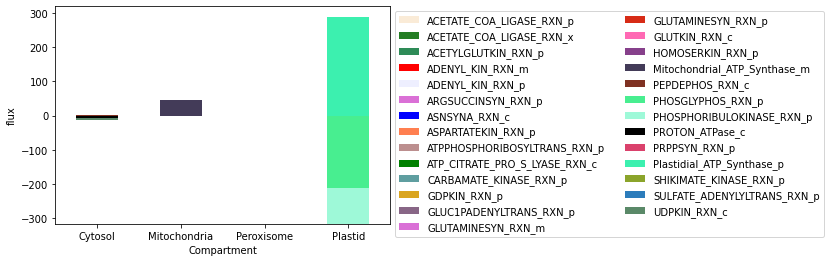

In [34]:
frames = [new1, new2]
frames = pd.concat(frames)

color_dict = {'ADENYL_KIN_RXN_m': 'red', 'GLUTAMINESYN_RXN_m': 'orchid', '6PFRUCTPHOS_RXN_c': 'yellow',
              'ASNSYNA_RXN_c': 'blue', 'ATP_CITRATE_PRO_S_LYASE_RXN_c': 'green','FRUCTOKINASE_RXN_c': 'purple',
              'GLUTKIN_RXN_c': '#ff69b4', 'PROTON_ATPase_c': 'black', 'PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c': 'cyan',
              '6PFRUCTPHOS_RXN_p': 'magenta', 'ACETATE_COA_LIGASE_RXN_p': '#faebd7','ACETYLGLUTKIN_RXN_p': '#2e8b57',
              'ADENYL_KIN_RXN_p': '#eeefff', 'ARGSUCCINSYN_RXN_p': '#da70d6', 'ASPARTATEKIN_RXN_p': '#ff7f50',
              'ATPPHOSPHORIBOSYLTRANS_RXN_p': '#bc8f8f','CARBAMATE_KINASE_RXN_p': '#5f9ea0',
              'GDPKIN_RXN_p': '#daa520', 'GLUTAMINESYN_RXN_p': '#D72B16',
            'HOMOSERKIN_RXN_p': '#86408B', 'PHOSPHORIBULOKINASE_RXN_p': '#9EF9D8',
              'PRPPSYN_RXN_p': '#DA416C', 'SHIKIMATE_KINASE_RXN_p': '#8BA42B',
              'SULFATE_ADENYLYLTRANS_RXN_p': '#2C7CBB', 'PHOSGLYPHOS_RXN_p': '#48EE90', 'UDPKIN_RXN_c': '#5A8968',
             'Mitochondrial_ATP_Synthase_m': '#433B58', 'Plastidial_ATP_Synthase_p': '#3CF0AF',
             'PEPDEPHOS_RXN_p': '#423306', 'ACETATE_COA_LIGASE_RXN_x': '#247D23', 'GLUC1PADENYLTRANS_RXN_p': '#886686',
             'PEPDEPHOS_RXN_c': '#7F3122'}



"""Plotting the ATP production budget"""
# Stacked barchart
printmd("**ATP consumption and production budget plot**")
df = frames.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol=2)
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_ATP_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# NADPH budget plots

In [35]:
#Creating an empty dataframe
df_p = []
df_c = []
NADPH = ["NADPH_c", "NADPH_m", "NADPH_p", "NADPH_x"]
compartment = ["_c", "_m", "_p", "_x"]
for (a,com) in zip(NADPH,compartment):
    i = Auto.metabolites.get_by_id(a).summary(sol_auto)
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    #producer = p[p.reaction.str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-36-8d2332fc8a4a>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NADPH Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
GLUTSEMIALDEHYDROG_RXN_c,Cytosol,0.004843,GLUTSEMIALDEHYDROG_RXN_c,1.000000,100.000000
ACETOLACTREDUCTOISOM_RXN_p,Plastid,0.055896,ACETOLACTREDUCTOISOM_RXN_p,0.000224,0.022360
ACETOOHBUTREDUCTOISOM_RXN_p,Plastid,0.020159,ACETOOHBUTREDUCTOISOM_RXN_p,0.000081,0.008064
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,Plastid,0.130380,ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,0.000522,0.052157
GLUTATHIONE_REDUCT_NADPH_RXN_p,Plastid,0.009687,GLUTATHIONE_REDUCT_NADPH_RXN_p,0.000039,0.003875
MALATE_DEHYDROGENASE_NADP_RXN_p,Plastid,249.679156,MALATE_DEHYDROGENASE_NADP_RXN_p,0.998813,99.881338
N_ACETYLGLUTPREDUCT_RXN_p,Plastid,0.004843,N_ACETYLGLUTPREDUCT_RXN_p,0.000019,0.001938
SHIKIMATE_5_DEHYDROGENASE_RXN_p,Plastid,0.075662,SHIKIMATE_5_DEHYDROGENASE_RXN_p,0.000303,0.030268


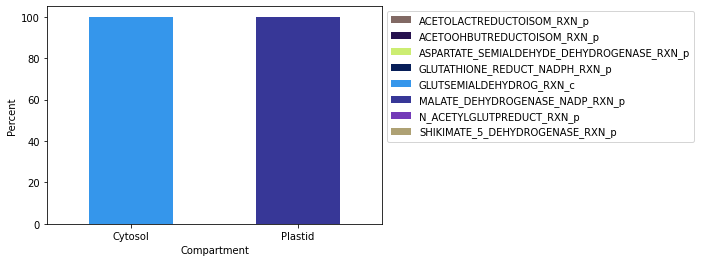

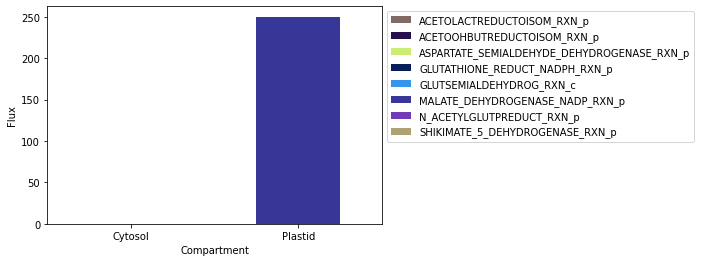

In [36]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]

new1


color_dict = {'GLUTSEMIALDEHYDROG_RXN_c': '#3596EB', 'ACETOLACTREDUCTOISOM_RXN_p': '#816964',
              'ACETOOHBUTREDUCTOISOM_RXN_p': '#26114E','ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p': '#CCED72',
              'GLUTATHIONE_REDUCT_NADPH_RXN_p': '#071E58', 'HOMOSERDEHYDROG_RXN_NADP_p': '#77BFFC',
              'MALATE_DEHYDROGENASE_NADP_RXN_p': '#373797', 'N_ACETYLGLUTPREDUCT_RXN_p': '#733AB8',
              'SHIKIMATE_5_DEHYDROGENASE_RXN_p': '#AEA174', '1_PERIOD_2_PERIOD_1_PERIOD_13_RXN_p': '#9F12DA'}


"""Plotting the NADPH Consumption budget"""
# Stacked barchart
printmd("**NADPH Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color=color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NADPH_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new1.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NADPH_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

<ipython-input-37-5561afb7887f>:11: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NADPH production budget plot**

,Compartment,flux,reaction,percent,Percentage
METHYLENETHFDEHYDROG_NADP_RXN_c,Cytosol,0.004843,METHYLENETHFDEHYDROG_NADP_RXN_c,1.000000,100.000000
1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,Plastid,249.970939,1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,0.999981,99.998062
PREPHENATE_DEHYDROGENASE_NADP_RXN_p,Plastid,0.004843,PREPHENATE_DEHYDROGENASE_NADP_RXN_p,0.000019,0.001938


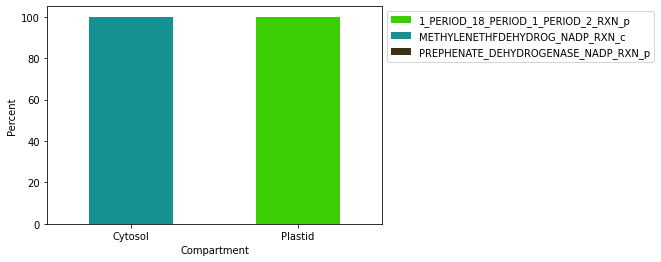

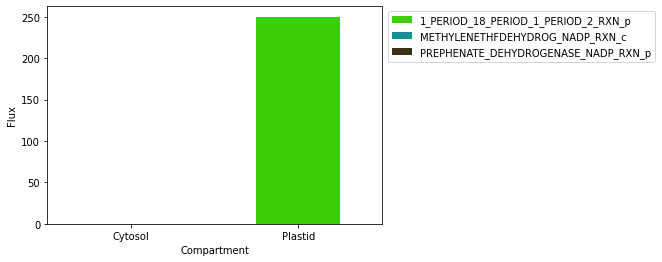

In [37]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    #column_values = pd.Series(per)
    #column_values.dropna()
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
new2 = new2.loc[new2['flux']!= 0]
new2

color_dict = {'METHYLENETHFDEHYDROG_NADP_RXN_c': '#169093', '1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p': '#3BCE05',
'RXN_5682_p': '#5D2FC4', 'PREPHENATE_DEHYDROGENASE_NADP_RXN_p': '#3B3114'}

"""Plotting the NADPH production budget"""
# Stacked barchart
printmd("**NADPH production budget plot**")
df_1 = new2.pivot_table(index='Compartment', columns='reaction', values='Percentage')
df_1.plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NADPH_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')


df_2 = new2.pivot_table(index='Compartment', columns='reaction', values='flux')
df_2.plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.33, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NADPH_production_flux.jpeg', format='jpeg', bbox_inches ='tight')
new2

In [38]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
GLUTSEMIALDEHYDROG_RXN_c,Cytosol,-0.004843,GLUTSEMIALDEHYDROG_RXN_c,1.000000,100.000000
ACETOLACTREDUCTOISOM_RXN_p,Plastid,-0.055896,ACETOLACTREDUCTOISOM_RXN_p,0.000224,0.022360
ACETOOHBUTREDUCTOISOM_RXN_p,Plastid,-0.020159,ACETOOHBUTREDUCTOISOM_RXN_p,0.000081,0.008064
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,Plastid,-0.130380,ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,0.000522,0.052157
GLUTATHIONE_REDUCT_NADPH_RXN_p,Plastid,-0.009687,GLUTATHIONE_REDUCT_NADPH_RXN_p,0.000039,0.003875
MALATE_DEHYDROGENASE_NADP_RXN_p,Plastid,-249.679156,MALATE_DEHYDROGENASE_NADP_RXN_p,0.998813,99.881338
N_ACETYLGLUTPREDUCT_RXN_p,Plastid,-0.004843,N_ACETYLGLUTPREDUCT_RXN_p,0.000019,0.001938
SHIKIMATE_5_DEHYDROGENASE_RXN_p,Plastid,-0.075662,SHIKIMATE_5_DEHYDROGENASE_RXN_p,0.000303,0.030268


**NADPH consumption and production budget plot**

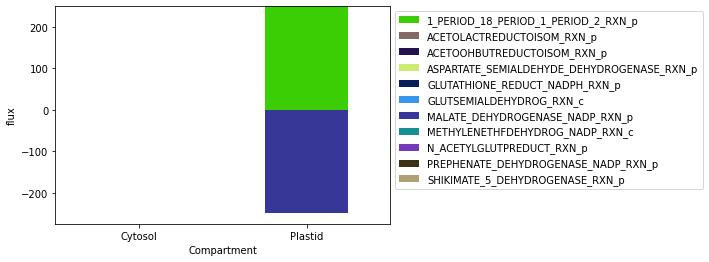

In [39]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

color_dict = {'GLUTSEMIALDEHYDROG_RXN_c': '#3596EB', 'ACETOLACTREDUCTOISOM_RXN_p': '#816964',
              'ACETOOHBUTREDUCTOISOM_RXN_p': '#26114E','ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p': '#CCED72',
              'GLUTATHIONE_REDUCT_NADPH_RXN_p': '#071E58', 'HOMOSERDEHYDROG_RXN_NADP_p': '#77BFFC',
              'MALATE_DEHYDROGENASE_NADP_RXN_p': '#373797', 'N_ACETYLGLUTPREDUCT_RXN_p': '#733AB8',
              'SHIKIMATE_5_DEHYDROGENASE_RXN_p': '#AEA174', '1_PERIOD_2_PERIOD_1_PERIOD_13_RXN_p': '#9F12DA',
             'METHYLENETHFDEHYDROG_NADP_RXN_c': '#169093', '1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p': '#3BCE05',
'RXN_5682_p': '#5D2FC4', 'PREPHENATE_DEHYDROGENASE_NADP_RXN_p': '#3B3114'}


"""Plotting the NADPH production budget"""
# Stacked barchart
printmd("**NADPH consumption and production budget plot**")
df = frames.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NADPH_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# NAD plots

In [40]:
#Creating an empty dataframe
df_p = []
df_c = []
NAD = ["NAD_c", "NAD_m", "NAD_p", "NAD_x"]
compartment = ["_c", "_m", "_p", "_x"]
for (a,com) in zip(NAD,compartment):
    i = Auto.metabolites.get_by_id(a).summary(sol_auto)
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    #producer = p[p.reaction.str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-41-a01c17701d75>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NAD Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
GCVMULTI_RXN_m,Mitochondria,0.000720,GCVMULTI_RXN_m,0.000042,0.004226
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,Mitochondria,0.458685,ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,0.026924,2.692352
MALATE_DEH_RXN_m,Mitochondria,16.118520,MALATE_DEH_RXN_m,0.946111,94.611071
PYRUVDEH_RXN_m,Mitochondria,0.458685,PYRUVDEH_RXN_m,0.026924,2.692352
MALATE_DEH_RXN_c,Cytosol,0.009687,MALATE_DEH_RXN_c,1.000000,100.000000
3_ISOPROPYLMALDEHYDROG_RXN_p,Plastid,0.023824,3_ISOPROPYLMALDEHYDROG_RXN_p,0.000102,0.010195
MALATE_DEH_RXN_p,Plastid,233.560636,MALATE_DEH_RXN_p,0.999458,99.945804
PGLYCDEHYDROG_RXN_p,Plastid,0.069313,PGLYCDEHYDROG_RXN_p,0.000297,0.029661
PYRUVDEH_RXN_p,Plastid,0.023824,PYRUVDEH_RXN_p,0.000102,0.010195
RXN_8001_p,Plastid,0.009687,RXN_8001_p,0.000041,0.004145


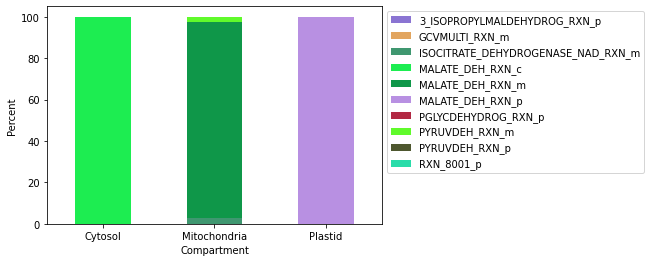

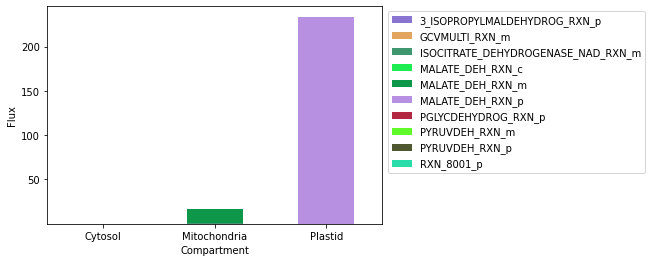

In [41]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]
new1

color_dict = {'GCVMULTI_RXN_m': '#E2A55F', 'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m': '#3F9770',
              'MALATE_DEH_RXN_m': '#0F9749','PYRUVDEH_RXN_m': '#60FA2B', 'GAPOXNPHOSPHN_RXN_c': '#1E4BFF',
'3_ISOPROPYLMALDEHYDROG_RXN_p': '#8A74D2', 'PGLYCDEHYDROG_RXN_p': '#B22843', 'PYRUVDEH_RXN_p': '#4E572F',
              'RXN_8001_p': '#29DCA9', 'MALATE_DEH_RXN_c': '#1DED51', 'MALATE_DEH_RXN_p': '#B890E2'}

"""Plotting the NAD Consumption budget"""
# Stacked barchart
printmd("**NAD Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NAD_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new1.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.30, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NAD_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

<ipython-input-42-2045a7c9292a>:11: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NAD production budget plot**

,Compartment,flux,reaction,percent,Percentage
1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c,Cytosol,0.004843,1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c,0.500000,50.000000
PYRROLINECARBREDUCT_RXN_NAD_c,Cytosol,0.004843,PYRROLINECARBREDUCT_RXN_NAD_c,0.500000,50.000000
DIHYDROPICRED_RXN_NAD_p,Plastid,0.025657,DIHYDROPICRED_RXN_NAD_p,0.000110,0.010979
GAPOXNPHOSPHN_RXN_p,Plastid,232.574671,GAPOXNPHOSPHN_RXN_p,0.995239,99.523888
GLUTAMATE_SYNTHASE_NADH_RXN_p,Plastid,0.982234,GLUTAMATE_SYNTHASE_NADH_RXN_p,0.004203,0.420320
HOMOSERDEHYDROG_RXN_NAD_p,Plastid,0.104723,HOMOSERDEHYDROG_RXN_NAD_p,0.000448,0.044813


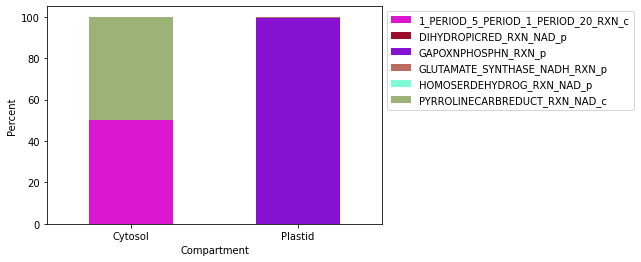

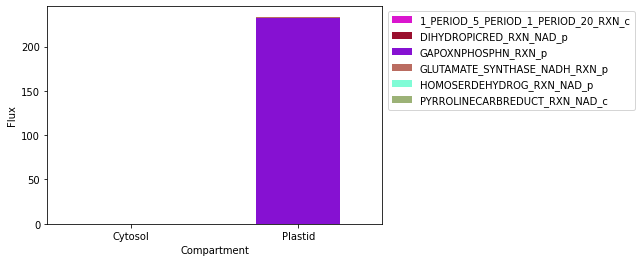

In [42]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    #column_values = pd.Series(per)
    #column_values.dropna()
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
new2 = new2.loc[new2['flux']!= 0]
new2


color_dict = {'1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c': '#DA16CE', 'PYRROLINECARBREDUCT_RXN_NAD_c': '#9CB277',
              'DIHYDROPICRED_RXN_NAD_p': '#9A0F2E', 'HOMOSERDEHYDROG_RXN_NAD_p': '#80FCD6',
             'GAPOXNPHOSPHN_RXN_p': '#8611D2', 'GLUTAMATE_SYNTHASE_NADH_RXN_p': '#BA6C61'}


"""Plotting the NAD production budget"""
# Stacked barchart
printmd("**NAD production budget plot**")
new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NAD_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new2.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.27, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NAD_production_flux.jpeg', format='jpeg', bbox_inches ='tight')
new2

In [43]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
GCVMULTI_RXN_m,Mitochondria,-0.000720,GCVMULTI_RXN_m,0.000042,0.004226
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,Mitochondria,-0.458685,ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,0.026924,2.692352
MALATE_DEH_RXN_m,Mitochondria,-16.118520,MALATE_DEH_RXN_m,0.946111,94.611071
PYRUVDEH_RXN_m,Mitochondria,-0.458685,PYRUVDEH_RXN_m,0.026924,2.692352
MALATE_DEH_RXN_c,Cytosol,-0.009687,MALATE_DEH_RXN_c,1.000000,100.000000
3_ISOPROPYLMALDEHYDROG_RXN_p,Plastid,-0.023824,3_ISOPROPYLMALDEHYDROG_RXN_p,0.000102,0.010195
MALATE_DEH_RXN_p,Plastid,-233.560636,MALATE_DEH_RXN_p,0.999458,99.945804
PGLYCDEHYDROG_RXN_p,Plastid,-0.069313,PGLYCDEHYDROG_RXN_p,0.000297,0.029661
PYRUVDEH_RXN_p,Plastid,-0.023824,PYRUVDEH_RXN_p,0.000102,0.010195
RXN_8001_p,Plastid,-0.009687,RXN_8001_p,0.000041,0.004145


**NAD consumption and production budget plot**

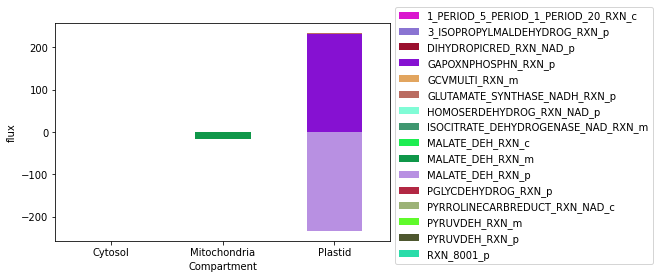

In [44]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

#import seaborn as sns

color_dict = {'GCVMULTI_RXN_m': '#E2A55F', 'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m': '#3F9770',
              'MALATE_DEH_RXN_m': '#0F9749','PYRUVDEH_RXN_m': '#60FA2B', 'GAPOXNPHOSPHN_RXN_c': '#1E4BFF',
'3_ISOPROPYLMALDEHYDROG_RXN_p': '#8A74D2', 'PGLYCDEHYDROG_RXN_p': '#B22843', 'PYRUVDEH_RXN_p': '#4E572F',
              'RXN_8001_p': '#29DCA9', 'MALATE_DEH_RXN_c': '#1DED51', '1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c': '#DA16CE', 'PYRROLINECARBREDUCT_RXN_NAD_c': '#9CB277',
              'DIHYDROPICRED_RXN_NAD_p': '#9A0F2E', 'HOMOSERDEHYDROG_RXN_NAD_p': '#80FCD6',
             'MALATE_DEH_RXN_p': '#B890E2', 'GAPOXNPHOSPHN_RXN_p': '#8611D2',
              'GLUTAMATE_SYNTHASE_NADH_RXN_p': '#BA6C61'}


"""Plotting the NAD production budget"""
# Stacked barchart
printmd("**NAD consumption and production budget plot**")
frames.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.6, 0.5, 0.5))
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('AUTO_NAD_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# Heterotrophic condition

In [45]:
Hetero = MSI_textbook.copy()

Appplying constraints for Heterotrophic conditions

In [46]:
Hetero.reactions.Photon_tx.bounds = (0,0)

In [47]:
sol_hetero = Hetero.optimize()

# ATP budget plots

In [48]:
#Creating an empty dataframe
df_p = []
df_c = []
ATP = ["ATP_c", "ATP_m", "ATP_p", "ATP_x"]
compartment = ["_c", "_m", "_p", "_x"]

for (a,com) in zip(ATP,compartment):
    i = Hetero.metabolites.get_by_id(a).summary(sol_hetero)
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

**ATP Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
ADENYL_KIN_RXN_m,Mitochondria,1.079811,ADENYL_KIN_RXN_m,0.001233,8.865096
GLUTAMINESYN_RXN_m,Mitochondria,11.100663,GLUTAMINESYN_RXN_m,0.012678,91.134904
6PFRUCTPHOS_RXN_c,Cytosol,55.209114,6PFRUCTPHOS_RXN_c,0.072083,7.626618
ASNSYNA_RXN_c,Cytosol,0.501072,ASNSYNA_RXN_c,0.000654,0.069218
ATP_CITRATE_PRO_S_LYASE_RXN_c,Cytosol,0.139396,ATP_CITRATE_PRO_S_LYASE_RXN_c,0.000182,0.019256
FRUCTOKINASE_RXN_c,Cytosol,17.911385,FRUCTOKINASE_RXN_c,0.023386,2.474289
GLUTKIN_RXN_c,Cytosol,0.139396,GLUTKIN_RXN_c,0.000182,0.019256
PROTON_ATPase_c,Cytosol,650.000000,PROTON_ATPase_c,0.848666,89.791363
6PFRUCTPHOS_RXN_p,Plastid,2.999474,6PFRUCTPHOS_RXN_p,0.051914,5.191405
ACETYLGLUTKIN_RXN_p,Plastid,0.193010,ACETYLGLUTKIN_RXN_p,0.003341,0.334056


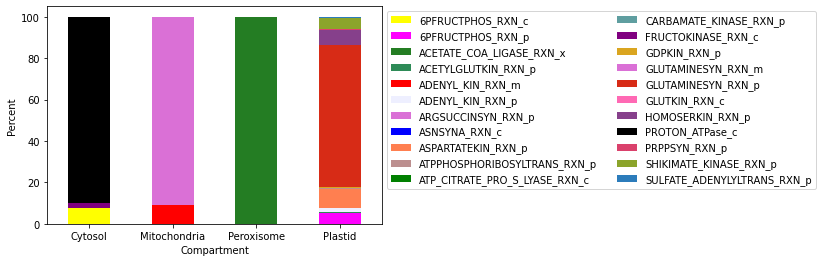

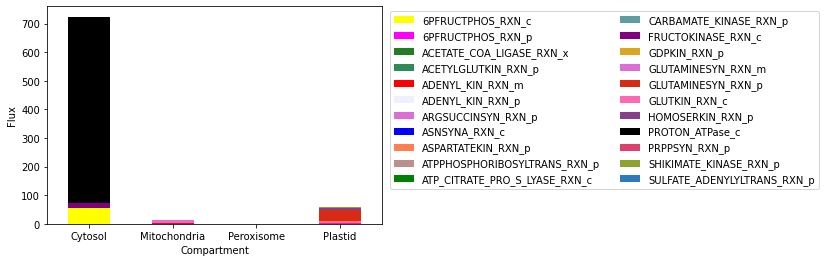

In [49]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]


import random

#import seaborn as sns

number_of_colors = len(new1.flux)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

color_dict = {'ADENYL_KIN_RXN_m': 'red', 'GLUTAMINESYN_RXN_m': 'orchid', '6PFRUCTPHOS_RXN_c': 'yellow',
              'ASNSYNA_RXN_c': 'blue', 'ATP_CITRATE_PRO_S_LYASE_RXN_c': 'green','FRUCTOKINASE_RXN_c': 'purple',
              'GLUTKIN_RXN_c': '#ff69b4', 'PROTON_ATPase_c': 'black', 'PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c': 'cyan',
              '6PFRUCTPHOS_RXN_p': 'magenta', 'ACETATE_COA_LIGASE_RXN_p': '#faebd7','ACETYLGLUTKIN_RXN_p': '#2e8b57',
              'ADENYL_KIN_RXN_p': '#eeefff', 'ARGSUCCINSYN_RXN_p': '#da70d6', 'ASPARTATEKIN_RXN_p': '#ff7f50',
              'ATPPHOSPHORIBOSYLTRANS_RXN_p': '#bc8f8f','CARBAMATE_KINASE_RXN_p': '#5f9ea0',
              'GDPKIN_RXN_p': '#daa520', 'GLUTAMINESYN_RXN_p': '#D72B16',
            'HOMOSERKIN_RXN_p': '#86408B', 'PHOSPHORIBULOKINASE_RXN_p': '#9EF9D8',
              'PRPPSYN_RXN_p': '#DA416C', 'SHIKIMATE_KINASE_RXN_p': '#8BA42B',
              'SULFATE_ADENYLYLTRANS_RXN_p': '#2C7CBB', 'PHOSGLYPHOS_RXN_p': '#48EE90', 'UDPKIN_RXN_c': '#5A8968',
             'ACETATE_COA_LIGASE_RXN_x': '#247D23'}


"""Plotting the ATP Consumption budget"""
# Stacked barchart
"""Percentage"""
printmd("**ATP Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True,ylabel="Percent", color =color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5), ncol = 2)
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_ATP_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')

"""Flux"""
df = new1.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=True, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.82, 0.5, 0.5, 0.5), ncol = 2)
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_ATP_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

<ipython-input-50-11ad88d3e503>:12: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**ATP production budget plot**

,Compartment,flux,reaction,percent,Percentage
Mitochondrial_ATP_Synthase_m,Mitochondria,836.827660,Mitochondrial_ATP_Synthase_m,0.955772,95.577156
SUCCCOASYN_RXN_m,Mitochondria,38.724294,SUCCCOASYN_RXN_m,0.044228,4.422844
PEPDEPHOS_RXN_c,Cytosol,47.682640,PEPDEPHOS_RXN_c,0.062256,33.494074
PHOSGLYPHOS_RXN_c,Cytosol,73.470873,PHOSGLYPHOS_RXN_c,0.095927,51.608696
UDPKIN_RXN_c,Cytosol,21.207909,UDPKIN_RXN_c,0.027690,14.897230


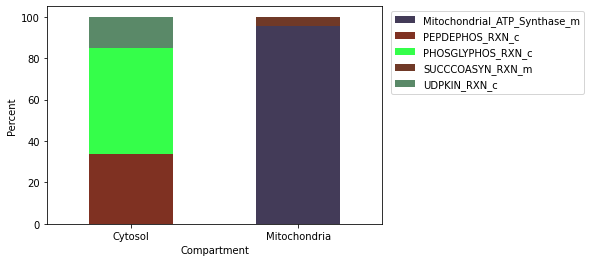

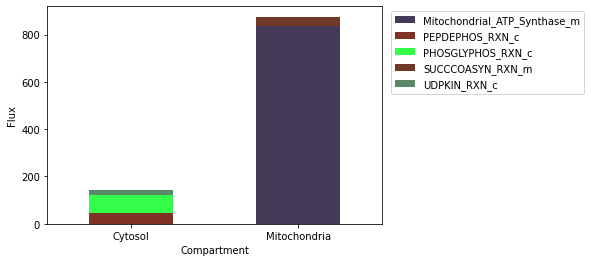

In [50]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []

per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
    new2 = new2.loc[new2['flux']!= 0]
    new2

    
color_dict = {'Mitochondrial_ATP_Synthase_m': '#433B58', 'PEPDEPHOS_RXN_c': '#7F3122',
'PHOSGLYPHOS_RXN_c': '#35FE4A', 'UDPKIN_RXN_c': '#5A8968', 'Plastidial_ATP_Synthase_p': '#3CF0AF',
             'SUCCCOASYN_RXN_m': '#703927'}

"""Plotting the ATP production budget"""
"""Percentage"""
# Stacked barchart
printmd("**ATP production budget plot**")
#new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = new2['reaction'].map(color_dict))
new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.12, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_ATP_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')

"""Flux"""
df = new2.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.12, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_ATP_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new2

In [51]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
ADENYL_KIN_RXN_m,Mitochondria,-1.079811,ADENYL_KIN_RXN_m,0.001233,8.865096
GLUTAMINESYN_RXN_m,Mitochondria,-11.100663,GLUTAMINESYN_RXN_m,0.012678,91.134904
6PFRUCTPHOS_RXN_c,Cytosol,-55.209114,6PFRUCTPHOS_RXN_c,0.072083,7.626618
ASNSYNA_RXN_c,Cytosol,-0.501072,ASNSYNA_RXN_c,0.000654,0.069218
ATP_CITRATE_PRO_S_LYASE_RXN_c,Cytosol,-0.139396,ATP_CITRATE_PRO_S_LYASE_RXN_c,0.000182,0.019256
FRUCTOKINASE_RXN_c,Cytosol,-17.911385,FRUCTOKINASE_RXN_c,0.023386,2.474289
GLUTKIN_RXN_c,Cytosol,-0.139396,GLUTKIN_RXN_c,0.000182,0.019256
PROTON_ATPase_c,Cytosol,-650.000000,PROTON_ATPase_c,0.848666,89.791363
6PFRUCTPHOS_RXN_p,Plastid,-2.999474,6PFRUCTPHOS_RXN_p,0.051914,5.191405
ACETYLGLUTKIN_RXN_p,Plastid,-0.193010,ACETYLGLUTKIN_RXN_p,0.003341,0.334056


**ATP consumption and production budget plot**

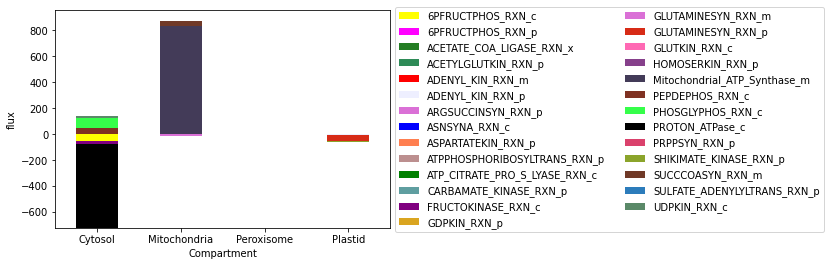

In [52]:
frames = [new1, new2]
frames = pd.concat(frames)

color_dict = {'ADENYL_KIN_RXN_m': 'red', 'GLUTAMINESYN_RXN_m': 'orchid', '6PFRUCTPHOS_RXN_c': 'yellow',
              'ASNSYNA_RXN_c': 'blue', 'ATP_CITRATE_PRO_S_LYASE_RXN_c': 'green','FRUCTOKINASE_RXN_c': 'purple',
              'GLUTKIN_RXN_c': '#ff69b4', 'PROTON_ATPase_c': 'black', 'PYRUVATEORTHOPHOSPHATE_DIKINASE_RXN_c': 'cyan',
              '6PFRUCTPHOS_RXN_p': 'magenta', 'ACETATE_COA_LIGASE_RXN_p': '#faebd7','ACETYLGLUTKIN_RXN_p': '#2e8b57',
              'ADENYL_KIN_RXN_p': '#eeefff', 'ARGSUCCINSYN_RXN_p': '#da70d6', 'ASPARTATEKIN_RXN_p': '#ff7f50',
              'ATPPHOSPHORIBOSYLTRANS_RXN_p': '#bc8f8f','CARBAMATE_KINASE_RXN_p': '#5f9ea0',
              'GDPKIN_RXN_p': '#daa520', 'GLUTAMINESYN_RXN_p': '#D72B16',
            'HOMOSERKIN_RXN_p': '#86408B', 'PHOSPHORIBULOKINASE_RXN_p': '#9EF9D8',
              'PRPPSYN_RXN_p': '#DA416C', 'SHIKIMATE_KINASE_RXN_p': '#8BA42B',
              'SULFATE_ADENYLYLTRANS_RXN_p': '#2C7CBB', 'PHOSGLYPHOS_RXN_p': '#48EE90', 'UDPKIN_RXN_c': '#5A8968',
             'Mitochondrial_ATP_Synthase_m': '#433B58', 'PEPDEPHOS_RXN_c': '#7F3122',
'PHOSGLYPHOS_RXN_c': '#35FE4A', 'UDPKIN_RXN_c': '#5A8968', 'Plastidial_ATP_Synthase_p': '#3CF0AF',
              'ACETATE_COA_LIGASE_RXN_x': '#247D23', 'SUCCCOASYN_RXN_m': '#703927'}



"""Plotting the ATP production budget"""
# Stacked barchart
printmd("**ATP consumption and production budget plot**")
df = frames.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.54, 0.5, 0.5), ncol=2)
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_ATP_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# NADPH budget plots

In [53]:
#Creating an empty dataframe
df_p = []
df_c = []
NADPH = ["NADPH_c", "NADPH_m", "NADPH_p", "NADPH_x"]
compartment = ["_c", "_m", "_p", "_x"]
for (a,com) in zip(NADPH,compartment):
    i = Hetero.metabolites.get_by_id(a).summary(sol_hetero)
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    #producer = p[p.reaction.str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-54-ce9d6973f2d1>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NADPH Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
GLUTSEMIALDEHYDROG_RXN_c,Cytosol,0.214455,GLUTSEMIALDEHYDROG_RXN_c,0.370000,36.999997
ISOCITDEH_RXN_c,Cytosol,0.365153,ISOCITDEH_RXN_c,0.630000,63.000003
1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,Plastid,1.286731,1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,0.089228,8.922829
ACETOLACTREDUCTOISOM_RXN_p,Plastid,2.474928,ACETOLACTREDUCTOISOM_RXN_p,0.171624,17.162379
ACETOOHBUTREDUCTOISOM_RXN_p,Plastid,0.892597,ACETOOHBUTREDUCTOISOM_RXN_p,0.061897,6.189711
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,Plastid,5.772901,ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,0.400322,40.032155
GLUTATHIONE_REDUCT_NADPH_RXN_p,Plastid,0.428910,GLUTATHIONE_REDUCT_NADPH_RXN_p,0.029743,2.974276
N_ACETYLGLUTPREDUCT_RXN_p,Plastid,0.214455,N_ACETYLGLUTPREDUCT_RXN_p,0.014871,1.487138
SHIKIMATE_5_DEHYDROGENASE_RXN_p,Plastid,3.350137,SHIKIMATE_5_DEHYDROGENASE_RXN_p,0.232315,23.231511


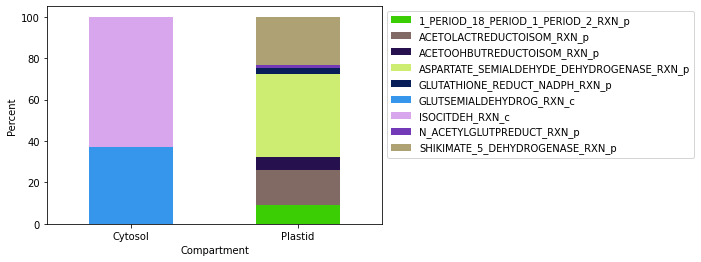

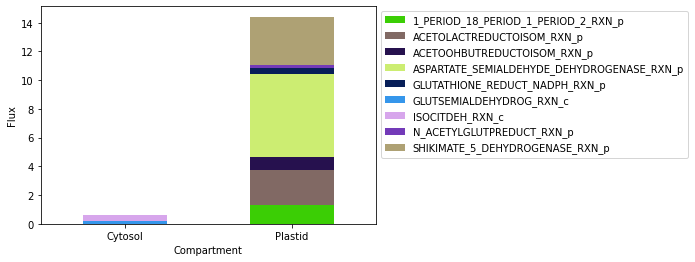

In [54]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]

new1


color_dict = {'GLUTSEMIALDEHYDROG_RXN_c': '#3596EB', 'ACETOLACTREDUCTOISOM_RXN_p': '#816964',
              'ACETOOHBUTREDUCTOISOM_RXN_p': '#26114E','ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p': '#CCED72',
              'GLUTATHIONE_REDUCT_NADPH_RXN_p': '#071E58', 'HOMOSERDEHYDROG_RXN_NADP_p': '#77BFFC',
              'MALATE_DEHYDROGENASE_NADP_RXN_p': '#373797', 'N_ACETYLGLUTPREDUCT_RXN_p': '#733AB8',
              'SHIKIMATE_5_DEHYDROGENASE_RXN_p': '#AEA174', '1_PERIOD_2_PERIOD_1_PERIOD_13_RXN_p': '#9F12DA',
             '1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p': '#3BCE05', 'ISOCITDEH_RXN_c': '#D7A6EC'}


"""Plotting the NADPH Consumption budget"""
# Stacked barchart
printmd("**NADPH Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NADPH_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')
new1.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NADPH_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

<ipython-input-55-194dbb06eec1>:11: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NADPH production budget plot**

,Compartment,flux,reaction,percent,Percentage
METHYLENETHFDEHYDROG_NADP_RXN_c,Cytosol,0.579609,METHYLENETHFDEHYDROG_NADP_RXN_c,1.000000,100.000000
6PGLUCONDEHYDROG_RXN_p,Plastid,7.103103,6PGLUCONDEHYDROG_RXN_p,0.492564,49.256431
GLU6PDEHYDROG_RXN_p,Plastid,7.103103,GLU6PDEHYDROG_RXN_p,0.492564,49.256431
PREPHENATE_DEHYDROGENASE_NADP_RXN_p,Plastid,0.214455,PREPHENATE_DEHYDROGENASE_NADP_RXN_p,0.014871,1.487138


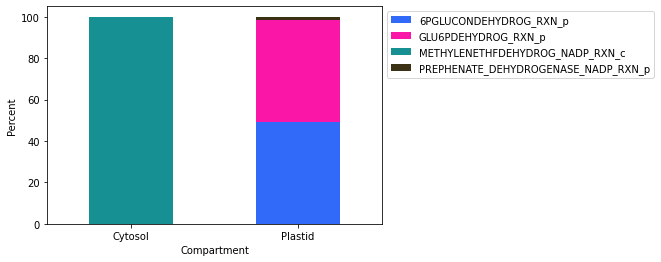

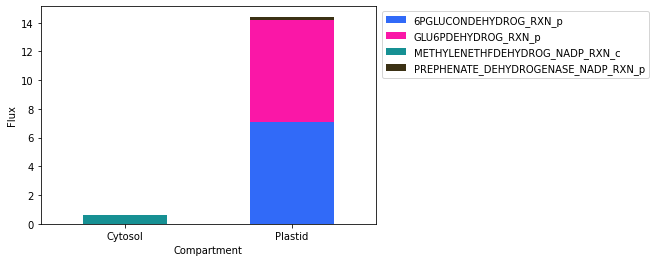

In [55]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    #column_values = pd.Series(per)
    #column_values.dropna()
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
new2 = new2.loc[new2['flux']!= 0]
new2

color_dict = {'METHYLENETHFDEHYDROG_NADP_RXN_c': '#169093', '6PGLUCONDEHYDROG_RXN_p': '#316AF8',
             'GLU6PDEHYDROG_RXN_p': '#FA17A7', 'PREPHENATE_DEHYDROGENASE_NADP_RXN_p': '#3B3114'}

"""Plotting the NADPH production budget"""
# Stacked barchart
printmd("**NADPH production budget plot**")
df_1 = new2.pivot_table(index='Compartment', columns='reaction', values='Percentage')
df_1.plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NADPH_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')


df_2 = new2.pivot_table(index='Compartment', columns='reaction', values='flux')
df_2.plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.33, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NADPH_production_flux.jpeg', format='jpeg', bbox_inches ='tight')
new2

In [56]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
GLUTSEMIALDEHYDROG_RXN_c,Cytosol,-0.214455,GLUTSEMIALDEHYDROG_RXN_c,0.370000,36.999997
ISOCITDEH_RXN_c,Cytosol,-0.365153,ISOCITDEH_RXN_c,0.630000,63.000003
1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,Plastid,-1.286731,1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p,0.089228,8.922829
ACETOLACTREDUCTOISOM_RXN_p,Plastid,-2.474928,ACETOLACTREDUCTOISOM_RXN_p,0.171624,17.162379
ACETOOHBUTREDUCTOISOM_RXN_p,Plastid,-0.892597,ACETOOHBUTREDUCTOISOM_RXN_p,0.061897,6.189711
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,Plastid,-5.772901,ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p,0.400322,40.032155
GLUTATHIONE_REDUCT_NADPH_RXN_p,Plastid,-0.428910,GLUTATHIONE_REDUCT_NADPH_RXN_p,0.029743,2.974276
N_ACETYLGLUTPREDUCT_RXN_p,Plastid,-0.214455,N_ACETYLGLUTPREDUCT_RXN_p,0.014871,1.487138
SHIKIMATE_5_DEHYDROGENASE_RXN_p,Plastid,-3.350137,SHIKIMATE_5_DEHYDROGENASE_RXN_p,0.232315,23.231511


**NADPH consumption and production budget plot**

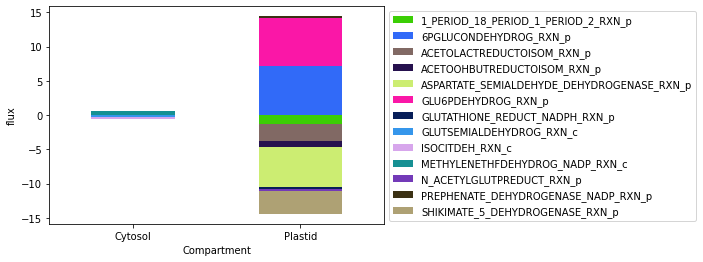

In [57]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

color_dict = {'GLUTSEMIALDEHYDROG_RXN_c': '#3596EB', 'ACETOLACTREDUCTOISOM_RXN_p': '#816964',
              'ACETOOHBUTREDUCTOISOM_RXN_p': '#26114E','ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p': '#CCED72',
              'GLUTATHIONE_REDUCT_NADPH_RXN_p': '#071E58', 'HOMOSERDEHYDROG_RXN_NADP_p': '#77BFFC',
              'MALATE_DEHYDROGENASE_NADP_RXN_p': '#373797', 'N_ACETYLGLUTPREDUCT_RXN_p': '#733AB8',
              'SHIKIMATE_5_DEHYDROGENASE_RXN_p': '#AEA174', '1_PERIOD_2_PERIOD_1_PERIOD_13_RXN_p': '#9F12DA',
             '1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p': '#3BCE05', 'ISOCITDEH_RXN_c': '#D7A6EC',
             'METHYLENETHFDEHYDROG_NADP_RXN_c': '#169093', '6PGLUCONDEHYDROG_RXN_p': '#316AF8',
             'GLU6PDEHYDROG_RXN_p': '#FA17A7', 'PREPHENATE_DEHYDROGENASE_NADP_RXN_p': '#3B3114'}


"""Plotting the NADPH production budget"""
# Stacked barchart
printmd("**NADPH consumption and production budget plot**")
df = frames.pivot_table(index='Compartment', columns='reaction', values='flux')
df.plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NADPH_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')

# NAD plots

In [58]:
#Creating an empty dataframe
df_p = []
df_c = []
NAD = ["NAD_c", "NAD_m", "NAD_p", "NAD_x"]
compartment = ["_c", "_m", "_p", "_x"]
for (a,com) in zip(NAD,compartment):
    i = Hetero.metabolites.get_by_id(a).summary(sol_hetero)
    p = i.producing_flux
    c = i.consuming_flux
    
# Retrieving the reactions using pandas and filtering the transport reactions
    #producer = p.loc[:,"reaction"].str.contains(com)
    producer = p.loc[:,"reaction"].str.endswith(com)
    #producer = p[p.reaction.str.endswith(com)
    producer = p[producer]
    df_p.append(producer)
    producer_df = pd.concat(df_p)
        
# Retrieving the reactions using pandas
    consumer = c.loc[:,"reaction"].str.endswith(com)
    consumer = c[consumer]
    df_c.append(consumer)
    consumer_df = pd.concat(df_c)

<ipython-input-59-b1705392a6a9>:17: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NAD Consumption budget plot**

,Compartment,flux,reaction,percent,Percentage
1_PERIOD_2_PERIOD_1_PERIOD_2_RXN_m,Mitochondria,0.365153,1_PERIOD_2_PERIOD_1_PERIOD_2_RXN_m,0.001285,0.128521
2OXOGLUTARATEDEH_RXN_m,Mitochondria,43.026993,2OXOGLUTARATEDEH_RXN_m,0.151440,15.143952
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,Mitochondria,63.701630,ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,0.224207,22.420680
MALATE_DEH_RXN_m,Mitochondria,113.475266,MALATE_DEH_RXN_m,0.399392,39.939208
PYRUVDEH_RXN_m,Mitochondria,63.550932,PYRUVDEH_RXN_m,0.223676,22.367639
GAPOXNPHOSPHN_RXN_c,Cytosol,113.032112,GAPOXNPHOSPHN_RXN_c,1.000000,100.000000
3_ISOPROPYLMALDEHYDROG_RXN_p,Plastid,1.054888,3_ISOPROPYLMALDEHYDROG_RXN_p,0.021427,2.142689
MALATE_DEH_RXN_p,Plastid,43.012750,MALATE_DEH_RXN_p,0.873676,87.367554
PGLYCDEHYDROG_RXN_p,Plastid,3.466059,PGLYCDEHYDROG_RXN_p,0.070403,7.040264
PYRUVDEH_RXN_p,Plastid,1.269343,PYRUVDEH_RXN_p,0.025783,2.578290


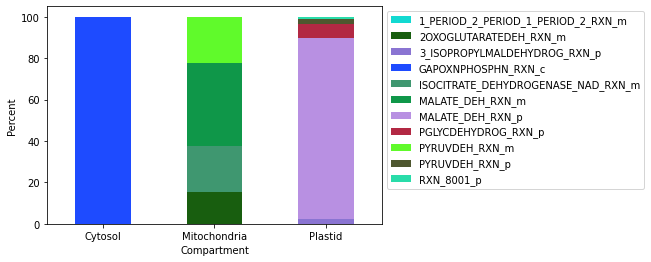

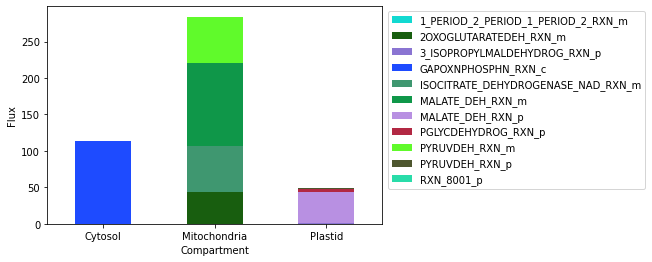

In [59]:
# Assigning Compartment name to the dataframe
# Converting the negative flux values into positive one
# Negative values corresponds to the ATP expenditure
consumer_df_1 = consumer_df.copy()

consumer_df_1.flux = abs(consumer_df.flux)
consumer_df_1
compartment = []
    
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = consumer_df_1[consumer_df_1.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    column_values = pd.Series(per)
    #print(per)
    compartment.append(compartment1)
    new1 = pd.concat(compartment)
    new1.insert(loc=4, column='Percentage', value=per)
new1 = new1.loc[new1['flux']!= 0]
new1

color_dict = {'GCVMULTI_RXN_m': '#E2A55F', 'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m': '#3F9770',
              'MALATE_DEH_RXN_m': '#0F9749','PYRUVDEH_RXN_m': '#60FA2B', 'GAPOXNPHOSPHN_RXN_c': '#1E4BFF',
'3_ISOPROPYLMALDEHYDROG_RXN_p': '#8A74D2', 'PGLYCDEHYDROG_RXN_p': '#B22843', 'PYRUVDEH_RXN_p': '#4E572F',
              'RXN_8001_p': '#29DCA9', 'MALATE_DEH_RXN_c': '#1DED51', 'MALATE_DEH_RXN_p': '#B890E2',
             '2OXOGLUTARATEDEH_RXN_m': '#185E0F', '1_PERIOD_2_PERIOD_1_PERIOD_2_RXN_m': '#12D9D1'}

"""Plotting the NAD Consumption budget"""
# Stacked barchart
printmd("**NAD Consumption budget plot**")
new1.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NAD_consumption_percent.jpeg', format='jpeg', bbox_inches = 'tight')

new1.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.30, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NAD_consumption_flux.jpeg', format='jpeg', bbox_inches = 'tight')
new1

<ipython-input-60-3f61e9707292>:11: RuntimeWarning: invalid value encountered in double_scalars
  percentage = compartment1.flux[k]/compartment1.flux.sum()*100


**NAD production budget plot**

,Compartment,flux,reaction,percent,Percentage
1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c,Cytosol,0.214455,1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c,0.001897,0.189729
MALATE_DEH_RXN_c,Cytosol,112.603202,MALATE_DEH_RXN_c,0.996205,99.620541
PYRROLINECARBREDUCT_RXN_NAD_c,Cytosol,0.214455,PYRROLINECARBREDUCT_RXN_NAD_c,0.001897,0.189729
DIHYDROPICRED_RXN_NAD_p,Plastid,1.136033,DIHYDROPICRED_RXN_NAD_p,0.023075,2.307511
GLUTAMATE_SYNTHASE_NADH_RXN_p,Plastid,43.459048,GLUTAMATE_SYNTHASE_NADH_RXN_p,0.882741,88.274076
HOMOSERDEHYDROG_RXN_NAD_p,Plastid,4.636868,HOMOSERDEHYDROG_RXN_NAD_p,0.094184,9.418413


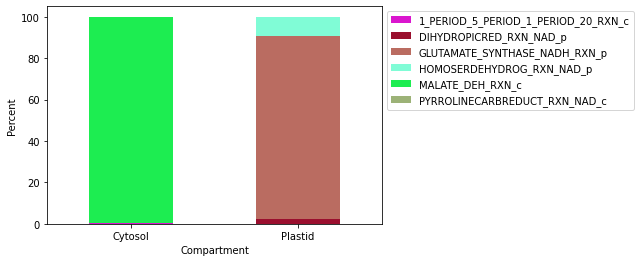

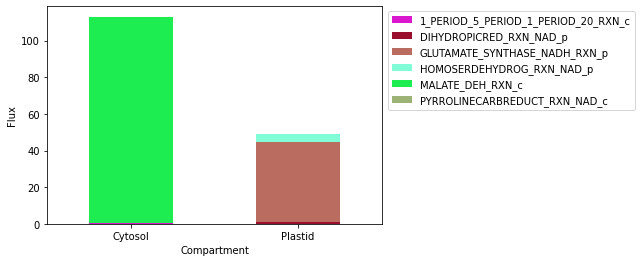

In [60]:
""" Assigning Compartment name to the dataframe """
producer_df
compartment = []
per = list() # Defining an empty list
com = ["_m", "_c", "_p", "_x"]
com1 = ["Mitochondria", "Cytosol", "Plastid", "Peroxisome"]

for (i,j) in zip(com, com1):
    compartment1 = producer_df[producer_df.reaction.str.endswith(i)]
    for k in np.arange(len(compartment1)):
        percentage = compartment1.flux[k]/compartment1.flux.sum()*100
        per.append(percentage)# Appending the rows in a per list
        #print(compartment1)
        
        # Inserting a new column in a dataframe
    compartment1.insert(0, "Compartment", j, True)
    #column_values = pd.Series(per)
    #column_values.dropna()
    compartment.append(compartment1)
    new2 = pd.concat(compartment)
    new2.insert(loc=4, column='Percentage', value=per)
new2 = new2.loc[new2['flux']!= 0]
new2


color_dict = {'1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c': '#DA16CE', 'PYRROLINECARBREDUCT_RXN_NAD_c': '#9CB277',
              'DIHYDROPICRED_RXN_NAD_p': '#9A0F2E', 'HOMOSERDEHYDROG_RXN_NAD_p': '#80FCD6',
              'MALATE_DEH_RXN_c': '#1DED51', 'GLUTAMATE_SYNTHASE_NADH_RXN_p': '#BA6C61'}


"""Plotting the NAD production budget"""
# Stacked barchart
printmd("**NAD production budget plot**")
new2.pivot_table(index='Compartment', columns='reaction', values='Percentage').plot.bar(rot=0, stacked=True, legend=False,ylabel="Percent", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NAD_production_percent.jpeg', format='jpeg', bbox_inches = 'tight')

new2.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False, ylabel="Flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.27, 0.5, 0.5, 0.5))
figsize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NAD_production_flux.jpeg', format='jpeg', bbox_inches ='tight')
new2

In [61]:
new1.flux = -(new1.flux)
new1

,Compartment,flux,reaction,percent,Percentage
1_PERIOD_2_PERIOD_1_PERIOD_2_RXN_m,Mitochondria,-0.365153,1_PERIOD_2_PERIOD_1_PERIOD_2_RXN_m,0.001285,0.128521
2OXOGLUTARATEDEH_RXN_m,Mitochondria,-43.026993,2OXOGLUTARATEDEH_RXN_m,0.151440,15.143952
ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,Mitochondria,-63.701630,ISOCITRATE_DEHYDROGENASE_NAD_RXN_m,0.224207,22.420680
MALATE_DEH_RXN_m,Mitochondria,-113.475266,MALATE_DEH_RXN_m,0.399392,39.939208
PYRUVDEH_RXN_m,Mitochondria,-63.550932,PYRUVDEH_RXN_m,0.223676,22.367639
GAPOXNPHOSPHN_RXN_c,Cytosol,-113.032112,GAPOXNPHOSPHN_RXN_c,1.000000,100.000000
3_ISOPROPYLMALDEHYDROG_RXN_p,Plastid,-1.054888,3_ISOPROPYLMALDEHYDROG_RXN_p,0.021427,2.142689
MALATE_DEH_RXN_p,Plastid,-43.012750,MALATE_DEH_RXN_p,0.873676,87.367554
PGLYCDEHYDROG_RXN_p,Plastid,-3.466059,PGLYCDEHYDROG_RXN_p,0.070403,7.040264
PYRUVDEH_RXN_p,Plastid,-1.269343,PYRUVDEH_RXN_p,0.025783,2.578290


**NAD consumption and production budget plot**

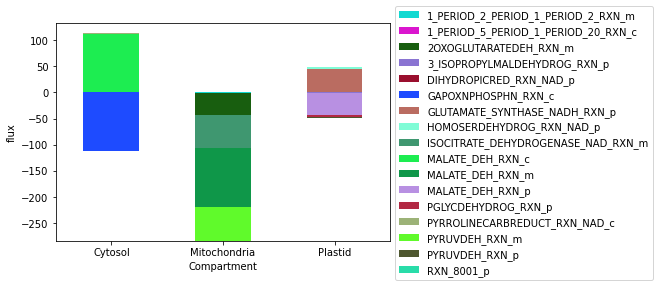

In [62]:
frames = [new1, new2]
frames = pd.concat(frames)
import random

#import seaborn as sns

color_dict = {'GCVMULTI_RXN_m': '#E2A55F', 'ISOCITRATE_DEHYDROGENASE_NAD_RXN_m': '#3F9770',
              'MALATE_DEH_RXN_m': '#0F9749','PYRUVDEH_RXN_m': '#60FA2B', 'GAPOXNPHOSPHN_RXN_c': '#1E4BFF',
'3_ISOPROPYLMALDEHYDROG_RXN_p': '#8A74D2', 'PGLYCDEHYDROG_RXN_p': '#B22843', 'PYRUVDEH_RXN_p': '#4E572F',
              'RXN_8001_p': '#29DCA9', 'MALATE_DEH_RXN_c': '#1DED51', 'MALATE_DEH_RXN_p': '#B890E2',
             '2OXOGLUTARATEDEH_RXN_m': '#185E0F', '1_PERIOD_2_PERIOD_1_PERIOD_2_RXN_m': '#12D9D1',
             '1_PERIOD_5_PERIOD_1_PERIOD_20_RXN_c': '#DA16CE', 'PYRROLINECARBREDUCT_RXN_NAD_c': '#9CB277',
              'DIHYDROPICRED_RXN_NAD_p': '#9A0F2E', 'HOMOSERDEHYDROG_RXN_NAD_p': '#80FCD6',
              'MALATE_DEH_RXN_c': '#1DED51', 'GLUTAMATE_SYNTHASE_NADH_RXN_p': '#BA6C61'}


"""Plotting the NAD production budget"""
# Stacked barchart
printmd("**NAD consumption and production budget plot**")
frames.pivot_table(index='Compartment', columns='reaction', values='flux').plot.bar(rot=0, stacked=True, legend=False,ylabel="flux", color = color_dict)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.6, 0.5, 0.5))
figsizesize = [9, 11] #To prevent the cropping of the image
plt.savefig('HETERO_NAD_consumption_production_flux.jpeg', format='jpeg', bbox_inches = 'tight')